In [264]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sqlite3
import numpy as np
from numpy import random
from datetime import datetime
from math import nan
from IPython.display import Image
from IPython.display import display
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [265]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)

In [266]:
sns.set_style("whitegrid")

### 1. Overview on all tables

#### 'matches' dataset

In [267]:
with sqlite3.connect('../dataset/database.sqlite') as con:
    matches = pd.read_sql_query("SELECT * from Match", con)

In [268]:
matches.shape

(25979, 115)

In [269]:
matches.isnull().sum()

id                      0
country_id              0
league_id               0
season                  0
stage                   0
date                    0
match_api_id            0
home_team_api_id        0
away_team_api_id        0
home_team_goal          0
away_team_goal          0
home_player_X1       1821
home_player_X2       1821
home_player_X3       1832
home_player_X4       1832
home_player_X5       1832
home_player_X6       1832
home_player_X7       1832
home_player_X8       1832
home_player_X9       1832
home_player_X10      1832
home_player_X11      1832
away_player_X1       1832
away_player_X2       1832
away_player_X3       1832
away_player_X4       1832
away_player_X5       1832
away_player_X6       1832
away_player_X7       1832
away_player_X8       1832
away_player_X9       1833
away_player_X10      1833
away_player_X11      1839
home_player_Y1       1821
home_player_Y2       1821
home_player_Y3       1832
home_player_Y4       1832
home_player_Y5       1832
home_player_

In [270]:
matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [271]:
matches.league_id.value_counts()

1729     3040
4769     3040
21518    3040
10257    3017
7809     2448
13274    2448
17642    2052
15722    1920
19694    1824
1        1728
24558    1422
Name: league_id, dtype: int64

In [272]:
matches['country_id'].equals(matches['league_id'])

True

In [273]:
matches['match_api_id'].is_unique

True

In [274]:
matches['id'].is_unique

True

In [400]:
matches.to_csv('../dataset/matches.csv', index = False)

#### 'countries' dataset

In [275]:
with sqlite3.connect('../dataset/database.sqlite') as con:
    countries = pd.read_sql_query("SELECT * from Country", con)

In [276]:
countries.shape

(11, 2)

In [277]:
countries.T

,0,1,2,3,4,5,6,7,8,9,10
id,1,1729,4769,7809,10257,13274,15722,17642,19694,21518,24558
name,Belgium,England,France,Germany,Italy,Netherlands,Poland,Portugal,Scotland,Spain,Switzerland


In [401]:
countries.to_csv('../dataset/countries.csv', index = False)

#### 'leagues' dataset

In [278]:
with sqlite3.connect('../dataset/database.sqlite') as con:
    leagues = pd.read_sql_query("SELECT * from League", con)

In [279]:
#this table doesn't contain all leagues in the 'matches' table
leagues.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [402]:
leagues.to_csv('../dataset/leagues.csv', index = False)

#### 'teams' dataset

In [280]:
with sqlite3.connect('../dataset/database.sqlite') as con:
    teams = pd.read_sql_query("SELECT * from Team", con)

In [281]:
teams.shape

(299, 5)

In [282]:
teams.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [283]:
teams.isna().sum()

id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64

In [403]:
teams.to_csv('../dataset/teams.csv', index = False)

#### 'team_detail' dataset

In [284]:
with sqlite3.connect('../dataset/database.sqlite') as con:
    team_detail = pd.read_sql_query("SELECT * from Team_Attributes", con)

In [285]:
team_detail.shape

(1458, 25)

In [286]:
team_detail.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [404]:
team_detail.to_csv('../dataset/team_detail.csv', index = False)

#### 'player' dataset

In [287]:
with sqlite3.connect('../dataset/database.sqlite') as con:
    player = pd.read_sql_query("SELECT * from Player", con)

In [288]:
player.shape

(11060, 7)

In [289]:
player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [290]:
player.isna().sum()

id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64

In [291]:
player.player_api_id.is_unique

True

In [405]:
player.to_csv('../dataset/player.csv', index = False)

#### 'player_detail' dataset

In [292]:
with sqlite3.connect('../dataset/database.sqlite') as con:
    player_detail = pd.read_sql_query("SELECT * from Player_Attributes", con)

In [293]:
player_detail.shape

(183978, 42)

In [294]:
player_detail.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [295]:
player_detail.isna().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [296]:
missing_rows = player_detail[player_detail.isnull().any(axis=1)]

In [297]:
len(missing_rows['player_api_id'].unique())

1345

In [298]:
player_detail['date'] = player_detail.apply(lambda x:datetime.strptime(x['date'], '%Y-%m-%d %H:%M:%S').year, axis =1)

In [299]:
player_detail['date'].value_counts()

2013    38867
2014    32808
2015    31834
2007    16138
2016    14103
2012    12632
2011    11976
2010    10829
2009     8993
2008     5798
Name: date, dtype: int64

In [406]:
player_detail.to_csv('../dataset/player_detail.csv', index = False)

### 2. Data transformation

#### 2.1 Transform player detail table

In [300]:
player_detail.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [301]:
player_detail.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [302]:
# Combine features with same purposes
feature_replace = {'passing':['crossing', 'short_passing', 'long_passing'], 
                   'shooting':['finishing','heading_accuracy','free_kick_accuracy','shot_power','long_shots'], 
                   'defence':['interceptions','marking','standing_tackle','sliding_tackle'],
                  'goalkeeping':['gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning','gk_reflexes']}

In [303]:
player_detail_new = player_detail.drop(columns = ['id', 'player_fifa_api_id', 'overall_rating','potential','preferred_foot', 
                                                  'attacking_work_rate', 'defensive_work_rate'])

In [304]:
for key, value in feature_replace.items():
    player_detail_new[key] = player_detail_new[value].mean(axis = 1)
    player_detail_new.drop(columns = player_detail_new[value], inplace = True)

In [306]:
#Get each player's average stats by year
player_detail_group = player_detail_new.groupby(['player_api_id', 'date']).mean().reset_index()

In [308]:
player_detail_group.isna().sum()

player_api_id       0
date                0
volleys          1444
dribbling           0
curve            1444
ball_control        0
acceleration        0
sprint_speed        0
agility          1444
reactions           0
balance          1444
jumping          1444
stamina             0
strength            0
aggression          0
positioning         0
vision           1444
penalties           0
passing             0
shooting            0
defence             0
goalkeeping         0
dtype: int64

#### 2.2 Transform matches table

In [309]:
# Get rid of irrelevant gambling data
matches = matches.loc[:, 'id':'away_player_11']

In [408]:
matches.shape

(21361, 77)

In [411]:
matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
145,146,1,1,2008/2009,24,2009,493017,8203,9987,2,1,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,38327.0,67950.0,67958.0,67959.0,37112.0,36393.0,148286.0,67898.0,164352.0,38801.0,26502.0,37937.0,38293.0,148313.0,104411.0,148314.0,37202.0,43158.0,9307.0,42153.0,32690.0,38782.0
153,154,1,1,2008/2009,25,2009,493025,9984,8342,1,3,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,36835.0,37047.0,37021.0,37051.0,104386.0,32863.0,37957.0,37909.0,38357.0,37065.0,78462.0,37990.0,21812.0,11736.0,37858.0,38366.0,37983.0,39578.0,38336.0,52280.0,27423.0,38440.0
155,156,1,1,2008/2009,25,2009,493027,8635,10000,2,0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,34480.0,38388.0,26458.0,13423.0,38389.0,30949.0,38393.0,38253.0,38383.0,38778.0,37069.0,37900.0,37886.0,37903.0,37889.0,94030.0,37893.0,37981.0,131531.0,130027.0,38231.0,131530.0
162,163,1,1,2008/2009,26,2009,493034,8203,8635,2,1,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,38327.0,67950.0,67958.0,38801.0,67898.0,37112.0,67959.0,148286.0,164352.0,33657.0,26502.0,34480.0,38388.0,38389.0,31316.0,164694.0,30949.0,38378.0,38383.0,38393.0,38253.0,37069.0
168,169,1,1,2008/2009,26,2009,493040,10000,9999,0,0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,37900.0,37886.0,37100.0,37903.0,37889.0,37893.0,37981.0,131531.0,131530.0,38231.0,130027.0,38318.0,38247.0,16387.0,94288.0,94284.0,45832.0,26669.0,33671.0,163670.0,37945.0,33622.0


In [409]:
matches.dropna(inplace = True)

In [410]:
matches.shape

(21361, 77)

In [314]:
#Simplify date info to year
matches['date'] = matches.apply(lambda x:datetime.strptime(x['date'], '%Y-%m-%d %H:%M:%S').year, axis =1)

In [315]:
# Save date info separately
matches_d = matches[['match_api_id','date']]

In [316]:
# Save player info separately
matches_p = matches.drop(columns = ['id', 'country_id','league_id','season', 'stage', 'home_team_api_id',
                                   'away_team_api_id'])

In [317]:
# Save game results info separately and transform
matches_r = matches[['match_api_id','home_team_goal','away_team_goal']]

matches_r['result'] = matches.apply(lambda row: 'win' if row['home_team_goal'] > row['away_team_goal'] else 
                                    'tie' if row['home_team_goal'] == row['away_team_goal'] else 'lose', axis = 1)

matches_r.drop(columns = ['home_team_goal', 'away_team_goal'], inplace = True)

In [320]:
list(matches.columns).index('home_player_X1')

11

In [321]:
list(matches.columns).index('away_player_Y11')

54

#### 2.2.1 Plot position data

In [322]:
position = matches.iloc[:,11:55]

In [323]:
position.head()

,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11
145,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0
153,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0
155,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0
162,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0
168,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0


In [324]:
position = position.astype(int)
position_tag = position.columns

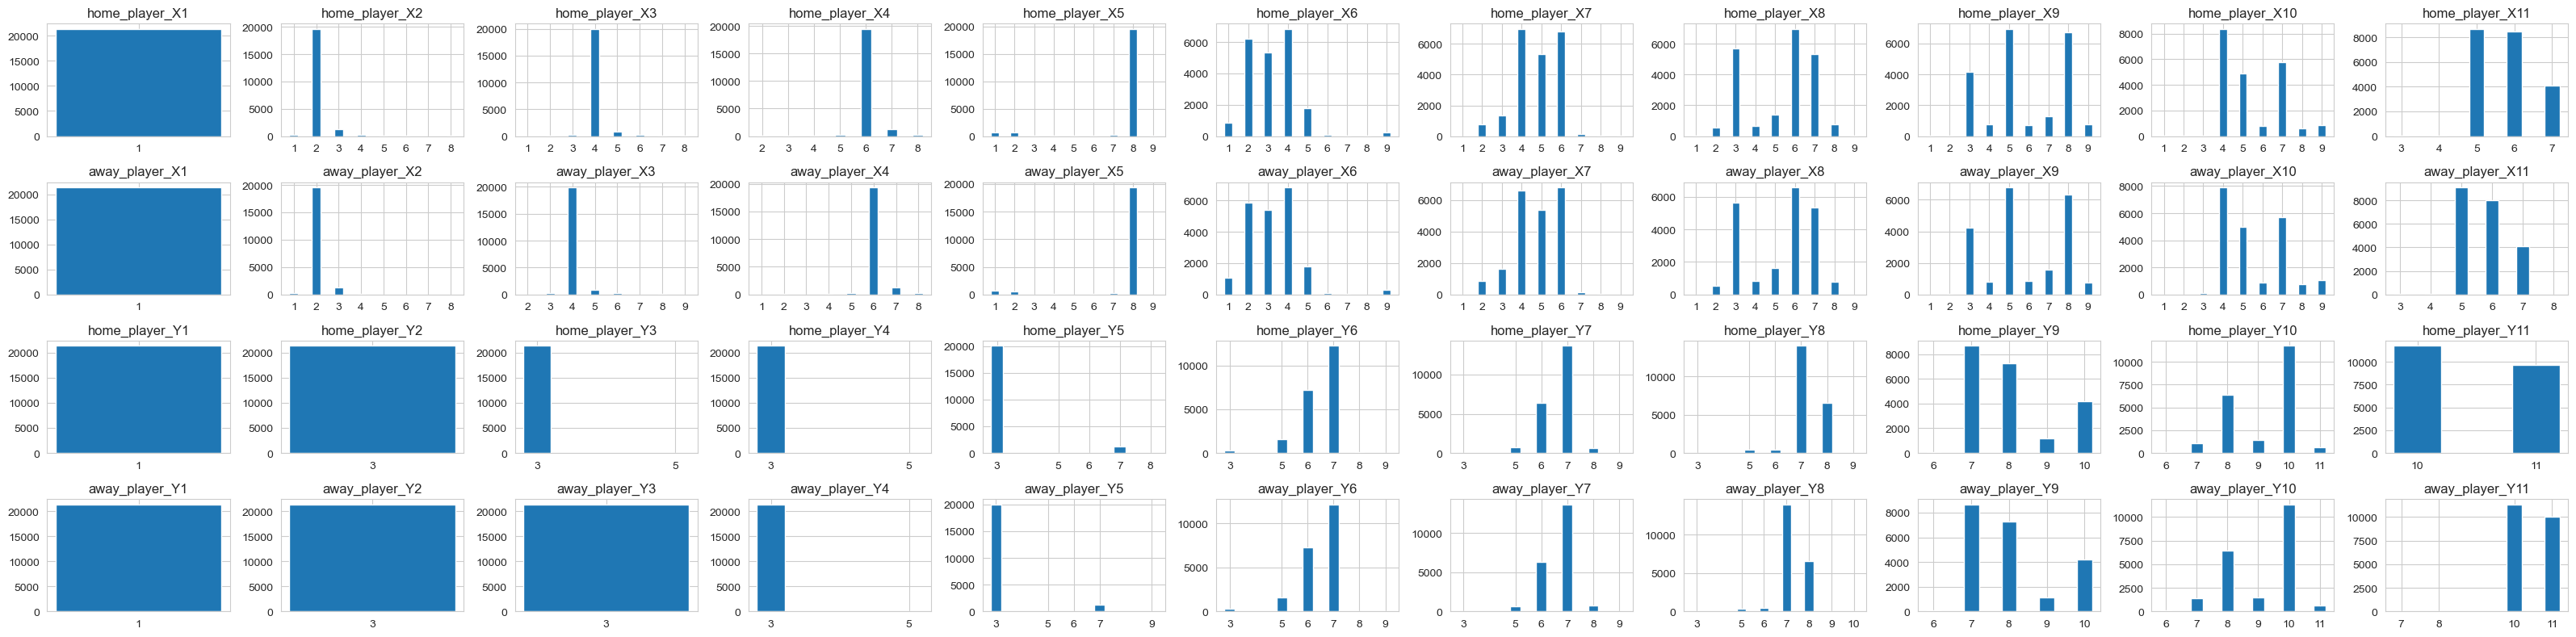

In [326]:
# Plot to see position distributions. 
fig, ax = plt.subplots(4, 11, figsize = (32, 8))
a = ax.ravel()
for index,ax in enumerate(a):
    counts = position.iloc[:, index].value_counts()
    ax.bar(counts.index, counts.values, width = 0.4)
    ax.set_title(position_tag[index])
    ax.set_xticks(counts.index)
plt.tight_layout()

- As seen, player_1 always have coordination(1,1) as the goalie. Field players were numbered from left to right on X-aixs and back to front on Y-axis.

#### 2.2.2 Assign position names to dataset

In [412]:
# Bring in position division diagram, from self decision
position_graph = Image(filename = '../imgs/positions.jpg')

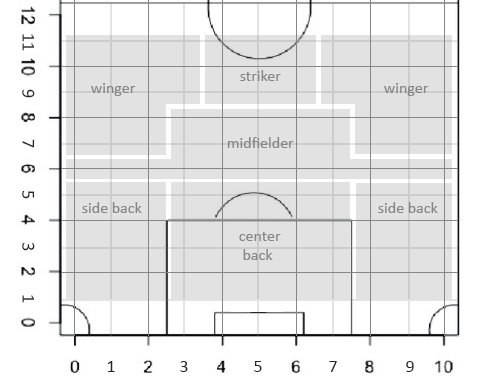

In [328]:
display(position_graph)

In [329]:
#get the list of player id columns
home_player_col = []
for i in range(1,12):
    home_player_col.append('home_player_' + str(i))
away_player_col = []
for i in range(1,12):
    away_player_col.append('away_player_' + str(i))
all_player_col = home_player_col + away_player_col

In [330]:
#get the list of player position columns
home_player_posX = []
for i in range(1,12):
    home_player_posX.append('home_player_X' + str(i))
away_player_posX = []
for i in range(1,12):
    away_player_posX.append('away_player_X' + str(i))
    
home_player_posY = []
for i in range(1,12):
    home_player_posY.append('home_player_Y' + str(i))
away_player_posY = []
for i in range(1,12):
    away_player_posY.append('away_player_Y' + str(i))

In [331]:
# Generate home player stats by position for each match
matches_h_player = matches[['match_api_id']+ home_player_col]  
matches_h_X = matches[['match_api_id']+ home_player_posX]
matches_h_Y = matches[['match_api_id']+ home_player_posY]

In [332]:
matches_a_player = matches[['match_api_id']+ away_player_col]  
matches_a_X = matches[['match_api_id']+ away_player_posX]
matches_a_Y = matches[['match_api_id']+ away_player_posY]

In [333]:
def get_positions(df,df_X,df_Y,home = True):
    
    if home:
        player = 'home_player'
    else:
        player = 'away_player'
    
    df_long = pd.wide_to_long(df, stubnames=[player], 
                            i="match_api_id", j="player_num", sep="_"
                           ).reset_index()
    df_long = df_long.rename(columns = {player: 'player_api_id'})
    
    df_X_long = pd.wide_to_long(df_X, stubnames=[player], 
                            i="match_api_id", j="player_num", sep="_X"
                           ).reset_index()
    df_X_long = df_X_long.rename(columns = {player: 'X'})   
    
    df_Y_long = pd.wide_to_long(df_Y, stubnames=[player], 
                            i="match_api_id", j="player_num", sep="_Y"
                           ).reset_index()
    df_Y_long = df_Y_long.rename(columns = {player: 'Y'})      
    
    df_XY = pd.merge(df_X_long, df_Y_long, on = ['match_api_id', 'player_num'])
    df_XY = pd.merge(df_long, df_XY, on = ['match_api_id', 'player_num'])
    
    df_XY['Position'] = df_XY.apply(
        lambda row: 'GK' if row['X'] ==1 and row['Y'] ==1 else 
        ('W' if ((row['X'] < 2.5 or row['X'] > 7.5) and row['Y'] == 7) or 
         ((row['X'] < 3.5 or row['X'] > 6.5) and row['Y'] > 7.5) else 
         ('ST' if row['Y'] > 8.5 else
          ('MF' if (row['Y'] > 5.5) or ((row['X'] > 2.5 or row['X'] < 7.5) and row['Y'] == 5) else
           ('CB' if row['X'] > 2.5 and row['X'] < 7.5 else 
            ('SB' if (row['X'] < 2.5 or row['X'] > 7.5) else ''))))), axis = 1)    
    
    df_XY.sort_values(by = 'match_api_id', inplace = True)
    df_XY.player_api_id = df_XY.player_api_id.astype('int64')
    
    return df_XY

In [334]:
matches_h_XY = get_positions(matches_h_player,matches_h_X,matches_h_Y)

<AxesSubplot:>

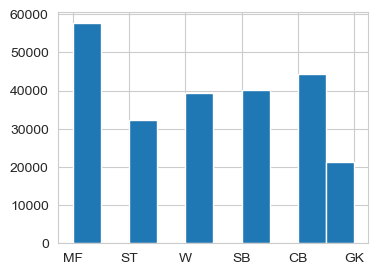

In [415]:
matches_h_XY['Position'].hist(figsize = (4,3))

In [336]:
# Plot samples
sample = matches['match_api_id'].sample(20)

In [337]:
def plot_position(match_id, df):
    match = df[df['match_api_id'] == match_id].reset_index()  
    match.loc[match['Y'] == 1, 'X'] = 5
    X = match['X']
    Y = match['Y']
    plt.figure(figsize=(4, 4))
    plt.scatter(X,Y, s = 4)    
    plt.xlim(0, 10)
    plt.ylim(0, 11)
    for i, pos in enumerate(match['Position']):
        plt.text(X[i], Y[i], pos, ha = 'center', va = 'bottom')
    plt.xlabel('X')
    plt.ylabel('Y')    

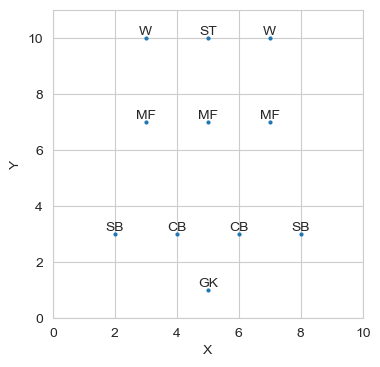

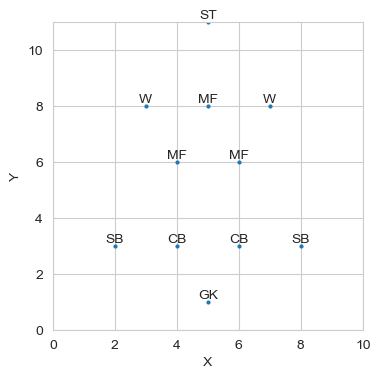

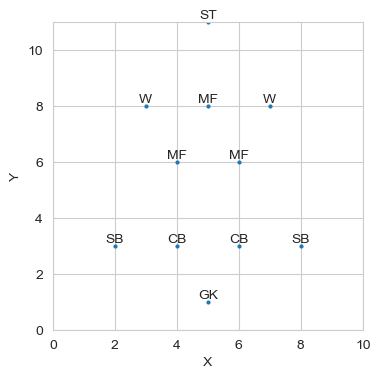

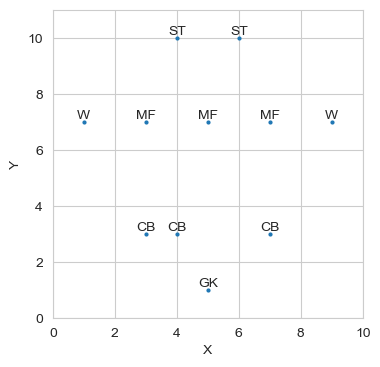

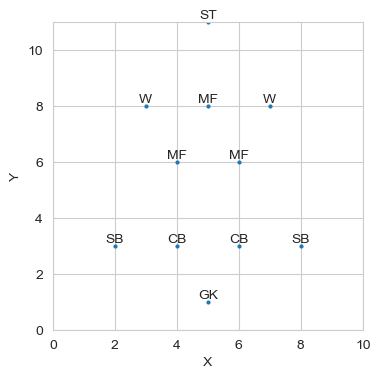

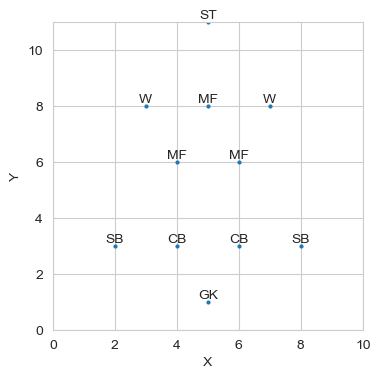

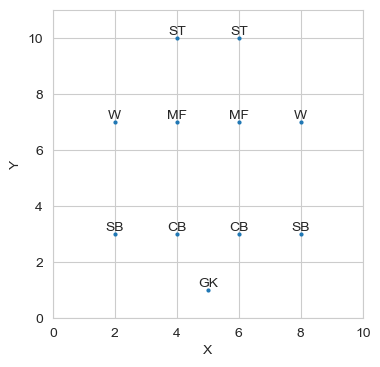

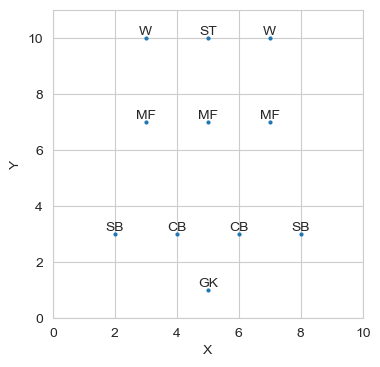

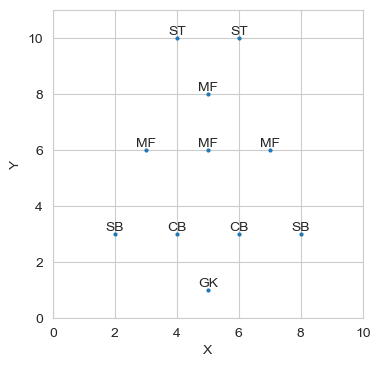

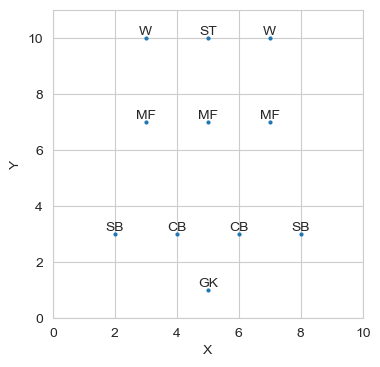

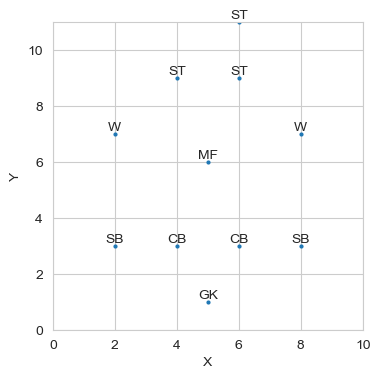

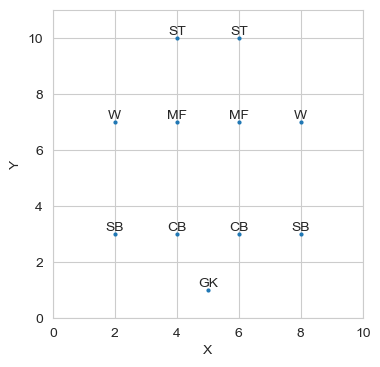

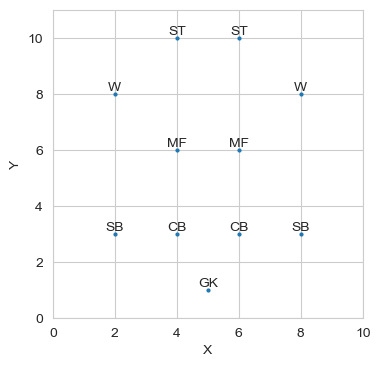

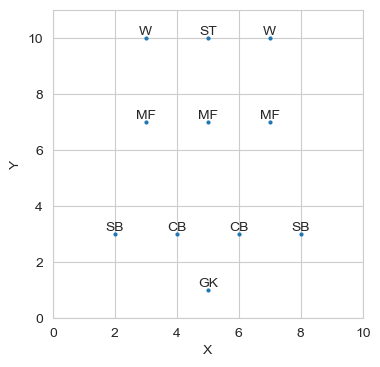

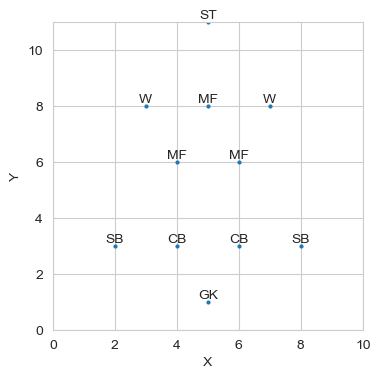

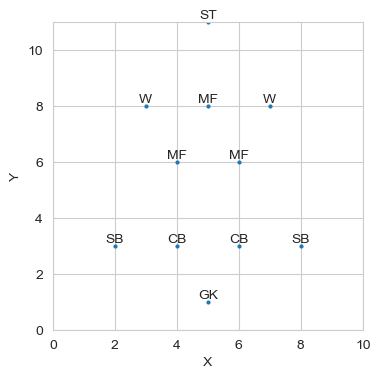

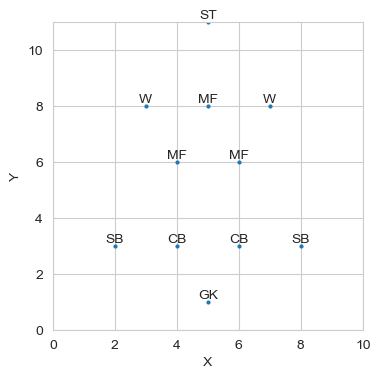

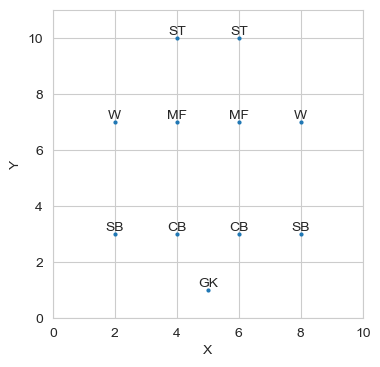

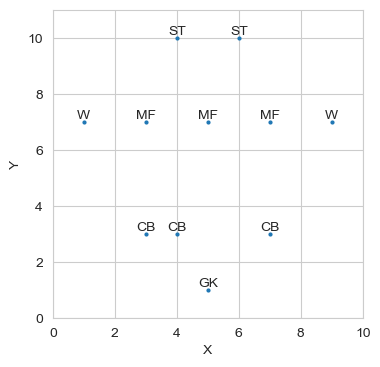

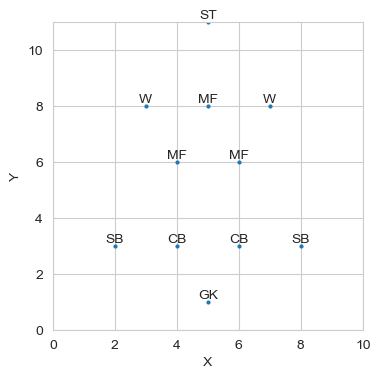

In [338]:
for match in list(sample):
    plot_position(match, matches_h_XY)

In [339]:
matches_a_XY = get_positions(matches_a_player,matches_a_X,matches_a_Y, home = False)

In [340]:
player_detail_group = player_detail_group.sort_values(['date'], ascending = True)

In [367]:
def add_stats(df):
    df = df.drop(columns = ['player_num','X', 'Y'])
    df_merge = pd.merge(df, matches_d, on = 'match_api_id')
    df_merge = df_merge.sort_values(['date'], ascending = True)
    
    df_merge = pd.merge_asof(df_merge, player_detail_group, on='date', by='player_api_id', direction='nearest')
        
    df_merge.drop(columns = ['player_api_id', 'date'], inplace = True)
    
    df_merge_mean = df_merge.groupby(['match_api_id', 'Position']).mean().round(2)
    df_merge_mean = df_merge_mean.reset_index()
    
    df_merge_wide = pd.pivot(df_merge_mean, index = 'match_api_id', columns = 'Position', 
                             values = ['dribbling','sprint_speed', 'passing', 'shooting', 'defence', 'goalkeeping'])
    df_merge_wide.columns = df_merge_wide.columns.to_flat_index()
    df_merge_wide = df_merge_wide.reset_index()
    
    return df_merge_wide

In [368]:
matches_h_stats = add_stats(matches_h_XY)  

In [369]:
matches_h_stats.isna().sum()

match_api_id             0
(dribbling, CB)          0
(dribbling, GK)          0
(dribbling, MF)          0
(dribbling, SB)       1303
(dribbling, ST)          0
(dribbling, W)        1859
(sprint_speed, CB)       0
(sprint_speed, GK)       0
(sprint_speed, MF)       0
(sprint_speed, SB)    1303
(sprint_speed, ST)       0
(sprint_speed, W)     1859
(passing, CB)            0
(passing, GK)            0
(passing, MF)            0
(passing, SB)         1303
(passing, ST)            0
(passing, W)          1859
(shooting, CB)           0
(shooting, GK)           0
(shooting, MF)           0
(shooting, SB)        1303
(shooting, ST)           0
(shooting, W)         1859
(defence, CB)            0
(defence, GK)            0
(defence, MF)            0
(defence, SB)         1303
(defence, ST)            0
(defence, W)          1859
(goalkeeping, CB)        0
(goalkeeping, GK)        0
(goalkeeping, MF)        0
(goalkeeping, SB)     1303
(goalkeeping, ST)        0
(goalkeeping, W)      1859
d

In [370]:
matches_a_stats = add_stats(matches_a_XY)  

#### 2.3 Combine player ratings and 

In [371]:
matches_combined = pd.merge(matches_h_stats, matches_a_stats, on = 'match_api_id', how = 'outer')

In [372]:
matches_combined.head()

,match_api_id,"('dribbling', 'CB')_x","('dribbling', 'GK')_x","('dribbling', 'MF')_x","('dribbling', 'SB')_x","('dribbling', 'ST')_x","('dribbling', 'W')_x","('sprint_speed', 'CB')_x","('sprint_speed', 'GK')_x","('sprint_speed', 'MF')_x","('sprint_speed', 'SB')_x","('sprint_speed', 'ST')_x","('sprint_speed', 'W')_x","('passing', 'CB')_x","('passing', 'GK')_x","('passing', 'MF')_x","('passing', 'SB')_x","('passing', 'ST')_x","('passing', 'W')_x","('shooting', 'CB')_x","('shooting', 'GK')_x","('shooting', 'MF')_x","('shooting', 'SB')_x","('shooting', 'ST')_x","('shooting', 'W')_x","('defence', 'CB')_x","('defence', 'GK')_x","('defence', 'MF')_x","('defence', 'SB')_x","('defence', 'ST')_x","('defence', 'W')_x","('goalkeeping', 'CB')_x","('goalkeeping', 'GK')_x","('goalkeeping', 'MF')_x","('goalkeeping', 'SB')_x","('goalkeeping', 'ST')_x","('goalkeeping', 'W')_x","('dribbling', 'CB')_y","('dribbling', 'GK')_y","('dribbling', 'MF')_y","('dribbling', 'SB')_y","('dribbling', 'ST')_y","('dribbling', 'W')_y","('sprint_speed', 'CB')_y","('sprint_speed', 'GK')_y","('sprint_speed', 'MF')_y","('sprint_speed', 'SB')_y","('sprint_speed', 'ST')_y","('sprint_speed', 'W')_y","('passing', 'CB')_y","('passing', 'GK')_y","('passing', 'MF')_y","('passing', 'SB')_y","('passing', 'ST')_y","('passing', 'W')_y","('shooting', 'CB')_y","('shooting', 'GK')_y","('shooting', 'MF')_y","('shooting', 'SB')_y","('shooting', 'ST')_y","('shooting', 'W')_y","('defence', 'CB')_y","('defence', 'GK')_y","('defence', 'MF')_y","('defence', 'SB')_y","('defence', 'ST')_y","('defence', 'W')_y","('goalkeeping', 'CB')_y","('goalkeeping', 'GK')_y","('goalkeeping', 'MF')_y","('goalkeeping', 'SB')_y","('goalkeeping', 'ST')_y","('goalkeeping', 'W')_y"
0,483130,51.0,21.0,73.50,51.0,74.5,68.0,72.0,67.0,74.50,76.5,78.5,71.5,59.67,41.33,78.00,62.67,64.17,74.33,53.50,19.8,74.30,60.3,65.7,70.70,77.62,29.50,66.62,81.50,49.38,78.88,27.8,81.0,31.10,28.3,26.4,30.4,33.5,25.0,55.50,60.50,65.5,66.0,63.0,44.0,72.50,73.5,67.0,76.00,51.67,44.67,73.00,67.33,53.17,71.00,48.2,25.0,55.30,51.9,64.0,68.3,69.42,33.75,70.75,64.50,36.71,61.75,25.7,73.0,29.30,26.40,22.9,26.0
1,483131,36.5,22.0,63.50,26.0,57.5,62.0,61.0,34.0,70.00,51.0,70.5,62.0,53.17,38.33,63.17,43.33,57.67,64.75,42.70,22.0,46.90,40.7,68.0,63.35,64.50,30.33,45.42,59.12,48.12,55.81,23.1,72.2,26.20,16.5,19.0,19.0,42.5,21.0,54.00,48.00,61.0,65.5,61.0,21.0,77.00,73.0,73.0,68.75,63.83,37.33,59.00,61.33,49.33,59.50,57.2,19.2,52.60,61.3,71.0,60.1,69.50,18.75,66.50,63.62,32.50,34.12,28.9,69.4,25.33,28.60,19.2,25.7
2,483133,58.0,22.0,75.67,60.5,88.0,78.5,77.0,24.0,71.33,78.0,85.0,78.0,71.00,41.00,76.00,77.33,68.67,79.17,57.70,22.4,72.40,67.1,81.4,67.80,75.31,19.75,57.42,74.38,42.75,67.00,30.9,81.4,22.93,26.0,22.4,30.4,51.5,22.0,66.00,45.50,47.0,67.0,66.5,32.0,69.33,67.5,66.0,73.00,68.67,38.67,66.89,60.50,54.00,59.33,59.7,21.0,61.73,46.7,38.2,67.4,72.25,31.50,60.33,70.50,63.50,33.62,28.1,74.6,26.93,26.80,22.0,25.3
3,483134,35.5,44.0,79.00,33.0,67.5,36.0,66.5,63.0,75.50,38.0,73.5,68.0,51.67,66.67,68.17,53.17,62.00,63.67,49.35,41.8,60.30,34.6,66.5,48.60,71.50,65.75,35.38,51.88,37.38,68.50,26.0,27.0,17.50,41.9,25.3,28.4,51.0,21.0,78.50,68.25,66.0,69.0,68.0,48.0,74.00,77.0,81.0,74.50,53.17,40.33,77.67,71.25,56.33,74.50,43.3,18.4,62.40,65.2,64.9,53.9,71.88,24.50,68.88,74.50,28.25,65.38,23.7,80.4,30.00,28.75,16.5,28.9
4,483135,55.0,22.0,62.33,42.5,57.0,76.5,75.0,52.0,71.67,64.0,64.0,78.5,71.00,38.33,64.78,49.33,48.00,69.50,49.90,19.2,57.47,49.8,61.4,71.30,80.38,29.00,62.75,47.75,39.75,40.50,29.5,77.6,28.67,23.2,23.0,25.0,53.0,22.0,71.33,61.00,75.0,66.5,69.5,57.0,80.00,80.5,84.0,69.50,65.00,37.00,74.78,70.50,65.67,63.83,52.9,19.2,69.93,61.2,65.2,67.1,77.50,29.25,66.92,72.62,37.75,60.38,28.8,67.2,29.40,28.60,26.2,28.3


In [373]:
column_names = matches_combined.columns

In [374]:
new_column_names = [name.replace("'", '').replace(', ', '_').replace('_x', '_home').replace('_y', '_away').
                    replace('(', '').replace(')', '') for name in matches_combined.columns]

In [375]:
matches_combined.columns = new_column_names

In [376]:
matches_combines_2 = pd.merge(matches_combined, matches_r, on = 'match_api_id')

In [377]:
matches_combines_2.head()

,match_api_id,dribbling_CB_home,dribbling_GK_home,dribbling_MF_home,dribbling_SB_home,dribbling_ST_home,dribbling_W_home,sprint_speed_CB_home,sprint_speed_GK_home,sprint_speed_MF_home,sprint_speed_SB_home,sprint_speed_ST_home,sprint_speed_W_home,passing_CB_home,passing_GK_home,passing_MF_home,passing_SB_home,passing_ST_home,passing_W_home,shooting_CB_home,shooting_GK_home,shooting_MF_home,shooting_SB_home,shooting_ST_home,shooting_W_home,defence_CB_home,defence_GK_home,defence_MF_home,defence_SB_home,defence_ST_home,defence_W_home,goalkeeping_CB_home,goalkeeping_GK_home,goalkeeping_MF_home,goalkeeping_SB_home,goalkeeping_ST_home,goalkeeping_W_home,dribbling_CB_away,dribbling_GK_away,dribbling_MF_away,dribbling_SB_away,dribbling_ST_away,dribbling_W_away,sprint_speed_CB_away,sprint_speed_GK_away,sprint_speed_MF_away,sprint_speed_SB_away,sprint_speed_ST_away,sprint_speed_W_away,passing_CB_away,passing_GK_away,passing_MF_away,passing_SB_away,passing_ST_away,passing_W_away,shooting_CB_away,shooting_GK_away,shooting_MF_away,shooting_SB_away,shooting_ST_away,shooting_W_away,defence_CB_away,defence_GK_away,defence_MF_away,defence_SB_away,defence_ST_away,defence_W_away,goalkeeping_CB_away,goalkeeping_GK_away,goalkeeping_MF_away,goalkeeping_SB_away,goalkeeping_ST_away,goalkeeping_W_away,result
0,483130,51.0,21.0,73.50,51.0,74.5,68.0,72.0,67.0,74.50,76.5,78.5,71.5,59.67,41.33,78.00,62.67,64.17,74.33,53.50,19.8,74.30,60.3,65.7,70.70,77.62,29.50,66.62,81.50,49.38,78.88,27.8,81.0,31.10,28.3,26.4,30.4,33.5,25.0,55.50,60.50,65.5,66.0,63.0,44.0,72.50,73.5,67.0,76.00,51.67,44.67,73.00,67.33,53.17,71.00,48.2,25.0,55.30,51.9,64.0,68.3,69.42,33.75,70.75,64.50,36.71,61.75,25.7,73.0,29.30,26.40,22.9,26.0,win
1,483131,36.5,22.0,63.50,26.0,57.5,62.0,61.0,34.0,70.00,51.0,70.5,62.0,53.17,38.33,63.17,43.33,57.67,64.75,42.70,22.0,46.90,40.7,68.0,63.35,64.50,30.33,45.42,59.12,48.12,55.81,23.1,72.2,26.20,16.5,19.0,19.0,42.5,21.0,54.00,48.00,61.0,65.5,61.0,21.0,77.00,73.0,73.0,68.75,63.83,37.33,59.00,61.33,49.33,59.50,57.2,19.2,52.60,61.3,71.0,60.1,69.50,18.75,66.50,63.62,32.50,34.12,28.9,69.4,25.33,28.60,19.2,25.7,win
2,483133,58.0,22.0,75.67,60.5,88.0,78.5,77.0,24.0,71.33,78.0,85.0,78.0,71.00,41.00,76.00,77.33,68.67,79.17,57.70,22.4,72.40,67.1,81.4,67.80,75.31,19.75,57.42,74.38,42.75,67.00,30.9,81.4,22.93,26.0,22.4,30.4,51.5,22.0,66.00,45.50,47.0,67.0,66.5,32.0,69.33,67.5,66.0,73.00,68.67,38.67,66.89,60.50,54.00,59.33,59.7,21.0,61.73,46.7,38.2,67.4,72.25,31.50,60.33,70.50,63.50,33.62,28.1,74.6,26.93,26.80,22.0,25.3,win
3,483134,35.5,44.0,79.00,33.0,67.5,36.0,66.5,63.0,75.50,38.0,73.5,68.0,51.67,66.67,68.17,53.17,62.00,63.67,49.35,41.8,60.30,34.6,66.5,48.60,71.50,65.75,35.38,51.88,37.38,68.50,26.0,27.0,17.50,41.9,25.3,28.4,51.0,21.0,78.50,68.25,66.0,69.0,68.0,48.0,74.00,77.0,81.0,74.50,53.17,40.33,77.67,71.25,56.33,74.50,43.3,18.4,62.40,65.2,64.9,53.9,71.88,24.50,68.88,74.50,28.25,65.38,23.7,80.4,30.00,28.75,16.5,28.9,win
4,483135,55.0,22.0,62.33,42.5,57.0,76.5,75.0,52.0,71.67,64.0,64.0,78.5,71.00,38.33,64.78,49.33,48.00,69.50,49.90,19.2,57.47,49.8,61.4,71.30,80.38,29.00,62.75,47.75,39.75,40.50,29.5,77.6,28.67,23.2,23.0,25.0,53.0,22.0,71.33,61.00,75.0,66.5,69.5,57.0,80.00,80.5,84.0,69.50,65.00,37.00,74.78,70.50,65.67,63.83,52.9,19.2,69.93,61.2,65.2,67.1,77.50,29.25,66.92,72.62,37.75,60.38,28.8,67.2,29.40,28.60,26.2,28.3,tie


In [378]:
matches_combines_2.shape

(21361, 74)

In [380]:
matches_combines_2.to_csv('../dataset/matches_combines_2.csv', index = False)